# Data Exploration for Trace Clustering

# Introduction
In this notebook, we will explore and visualize real event logs. 
We will load, decompress, and parse the logs, followed by data exploration and visualization.


In [69]:
# Loading the Event Logs
import os
import pm4py

def load_event_log(path):
    return pm4py.read_xes(path)

event_log_paths = [
    '../shared/example_files/CoSeLoG-WABO-4.xes',
    '../shared/example_files/CoSeLoG-WABO-1.xes'
    # Add more paths for other event logs if available
]

# Load event logs
logs = [load_event_log(path) for path in event_log_paths if os.path.exists(path)]

parsing log, completed traces ::   0%|          | 0/787 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/937 [00:00<?, ?it/s]

# Parsing the Event Logs
In this section, we will parse the event logs using the pm4py library.

In [70]:
# Converting logs to DataFrames for easier manipulation
import pandas as pd

def convert_log_to_dataframe(log):
    return pm4py.convert_to_dataframe(log)

dataframes = [convert_log_to_dataframe(log) for log in logs]

# Data Exploration
We will explore the event logs to understand the structure and content of the data.

In [71]:
# Example exploration on the first log
df = dataframes[0]

# Event Count
total_events = df.shape[0]
print(f"Total number of events: {total_events}")

# Unique Activities
unique_activities = df['concept:name'].nunique()
print(f"Number of unique activities: {unique_activities}")

# Timeframe
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
timeframe_start = df['time:timestamp'].min()
timeframe_end = df['time:timestamp'].max()
print(f"Timeframe: {timeframe_start} to {timeframe_end}")

Total number of events: 34848
Number of unique activities: 330
Timeframe: 2009-11-18 00:00:00+00:00 to 2013-12-30 10:26:30+00:00


# Visualization
We will create visualizations to better understand the distribution and trends in the event logs.

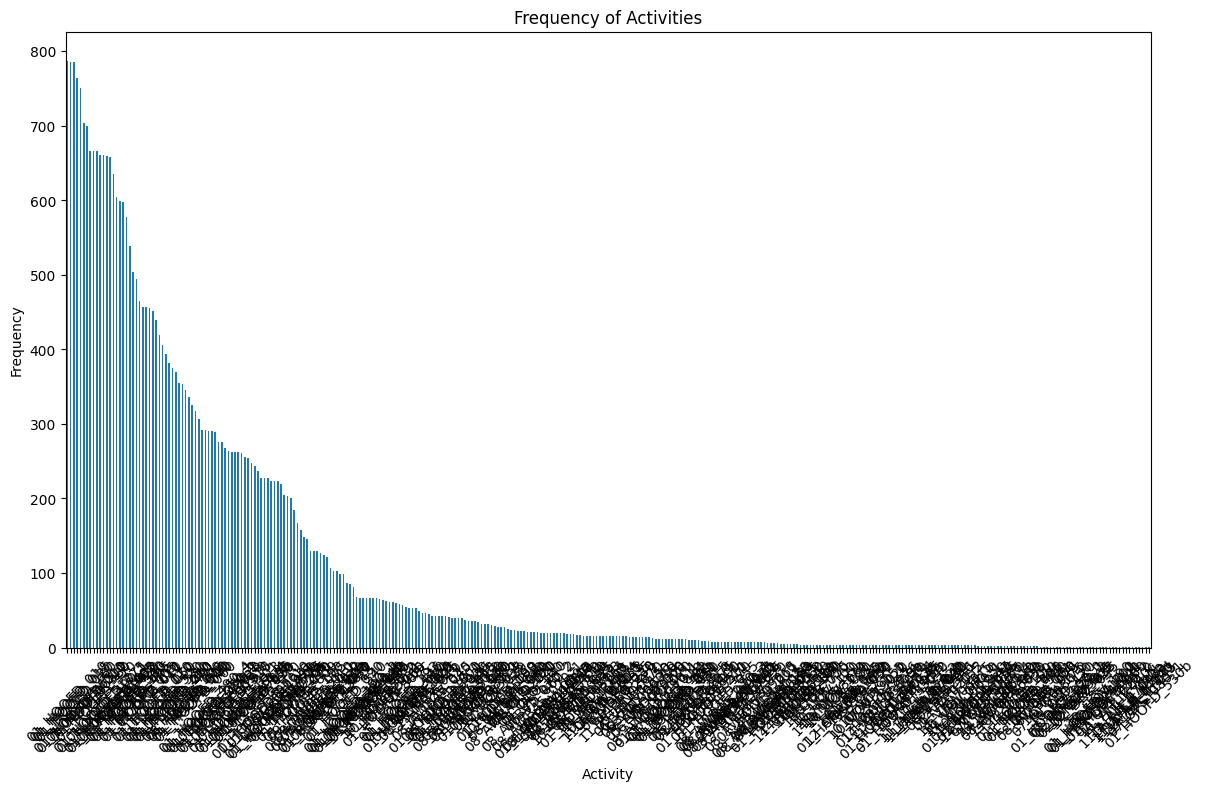

In [72]:
import matplotlib.pyplot as plt

# Bar Chart for Activity Frequency
activity_counts = df['concept:name'].value_counts()
plt.figure(figsize=(14, 8))
activity_counts.plot(kind='bar')
plt.title('Frequency of Activities')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Additional Analyses and Visualizations
To provide deeper insights into the event logs, we will perform additional analyses and visualizations including activity duration analysis, case duration analysis, event frequency over time, activity transition analysis, and event log summary statistics.

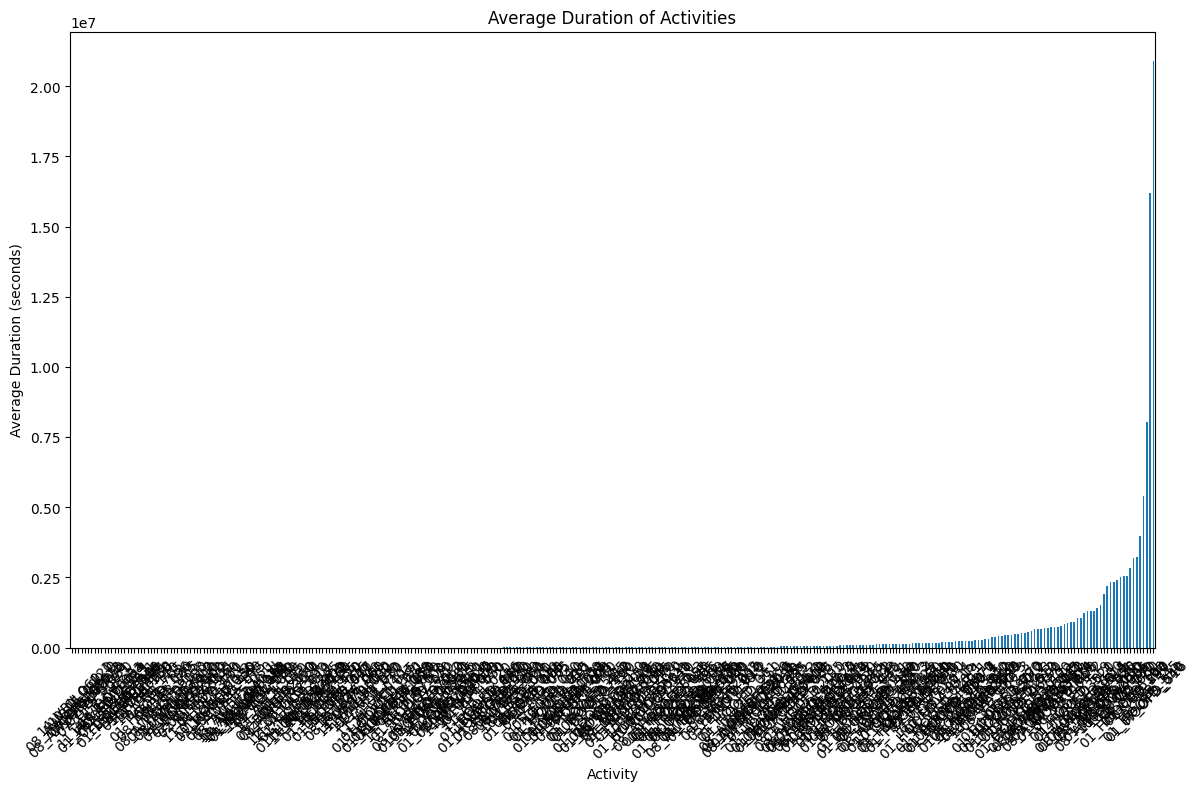

In [73]:
# Activity Duration Analysis
df['end_timestamp'] = df.groupby('case:concept:name')['time:timestamp'].shift(-1)
df['duration'] = (df['end_timestamp'] - df['time:timestamp']).dt.total_seconds()

df.dropna(subset=['duration'], inplace=True)
activity_duration = df.groupby('concept:name')['duration'].mean().sort_values()

plt.figure(figsize=(14, 8))
activity_duration.plot(kind='bar')
plt.title('Average Duration of Activities')
plt.xlabel('Activity')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

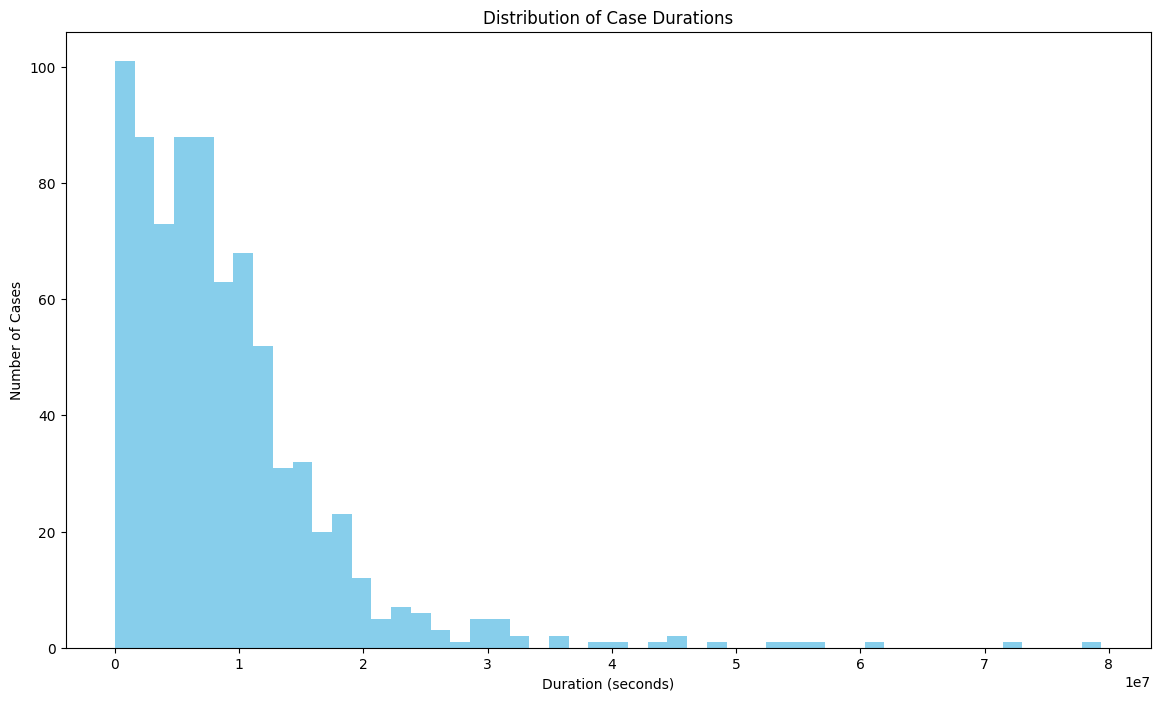

In [74]:
# Case Duration Analysis
case_duration = df.groupby('case:concept:name')['time:timestamp'].apply(lambda x: (x.max() - x.min()).total_seconds())

plt.figure(figsize=(14, 8))
plt.hist(case_duration, bins=50, color='skyblue')
plt.title('Distribution of Case Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Cases')
plt.show()

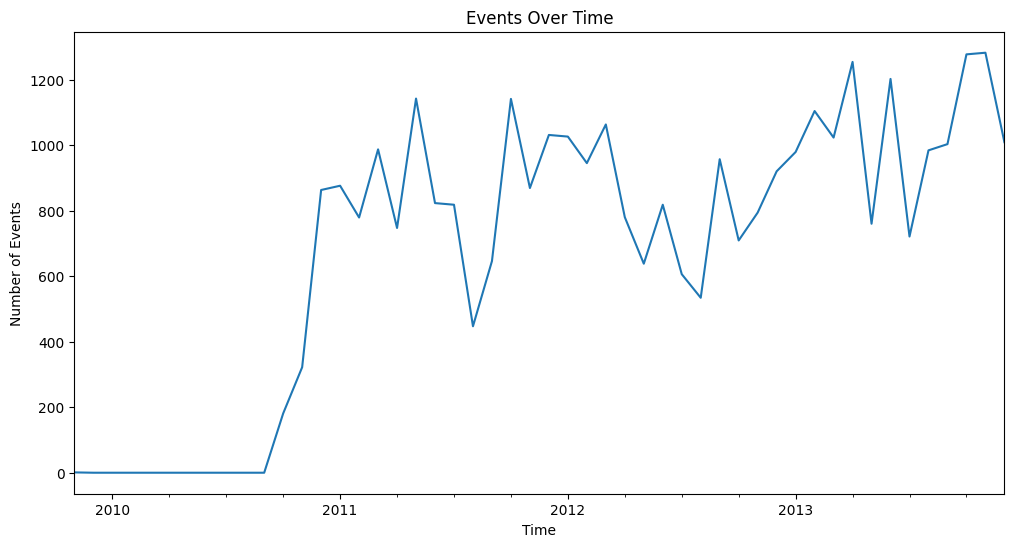

In [80]:
# Event Frequency Over Time
events_over_time = df.resample('ME', on='time:timestamp').size()

plt.figure(figsize=(12, 6))
events_over_time.plot(kind='line')
plt.title('Events Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()

In [ ]:
# Event Log Summary Statistics
num_cases = df['case:concept:name'].nunique()
num_events = df.shape[0]
num_activities = df['concept:name'].nunique()
avg_events_per_case = df.groupby('case:concept:name').size().mean()

print(f"Number of cases: {num_cases}")
print(f"Number of events: {num_events}")
print(f"Number of unique activities: {num_activities}")
print(f"Average number of events per case: {avg_events_per_case:.2f}")

# Exploration and Visualization for Additional Event Logs
We will now explore and visualize the additional event logs in our dataset.


Exploration and visualization for event log 2
Total number of events: 38944
Number of unique activities: 380
Timeframe: 2010-10-05 00:00:00+00:00 to 2014-01-07 00:00:00+00:00


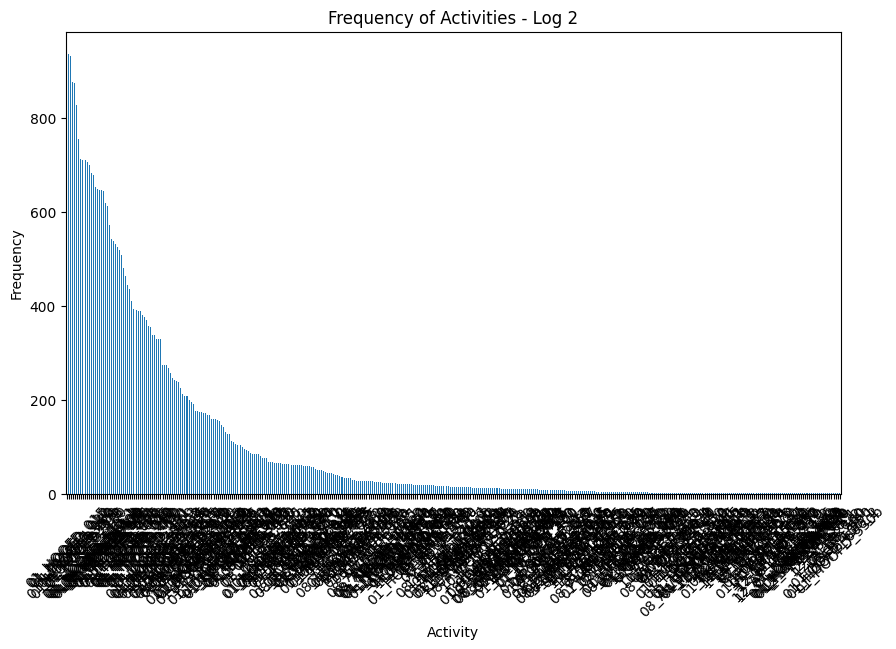

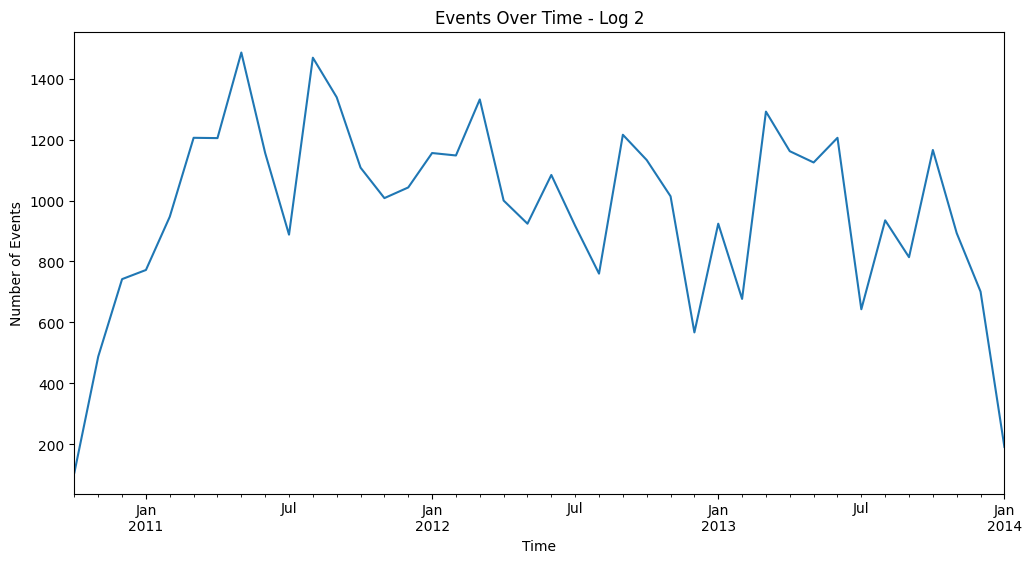

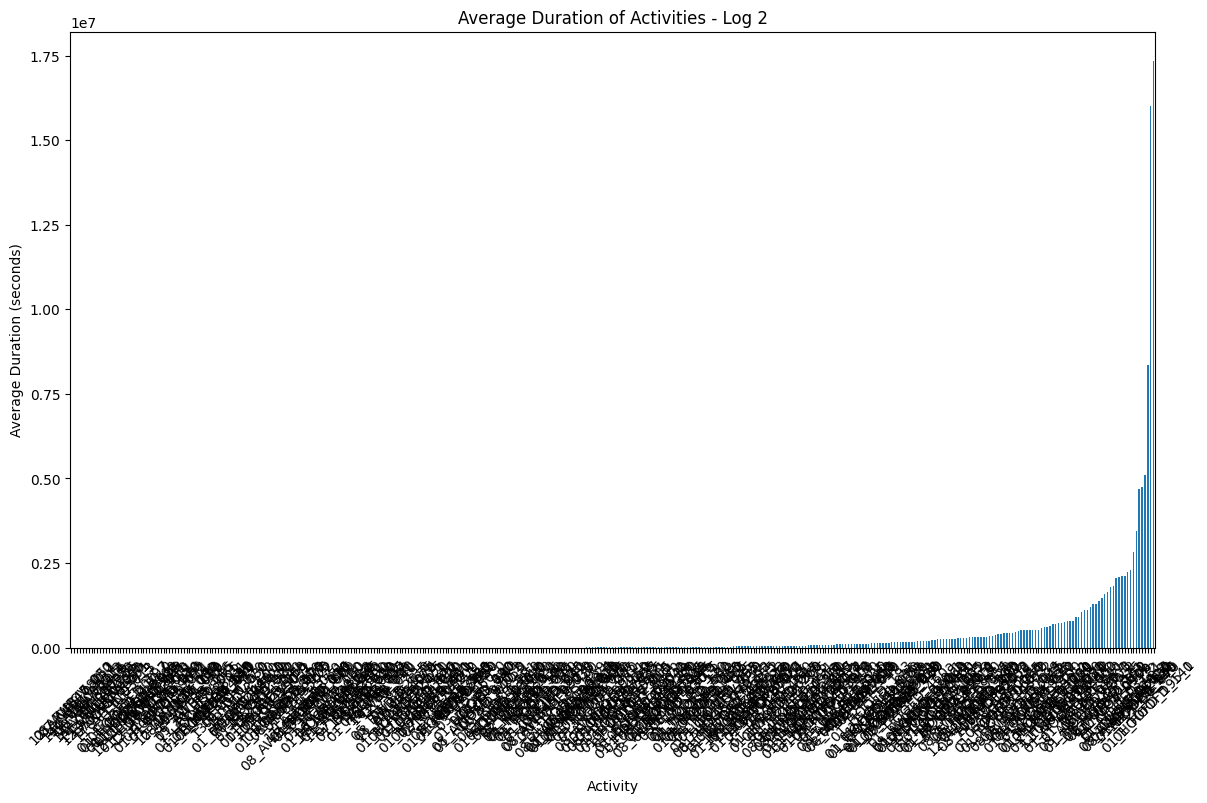

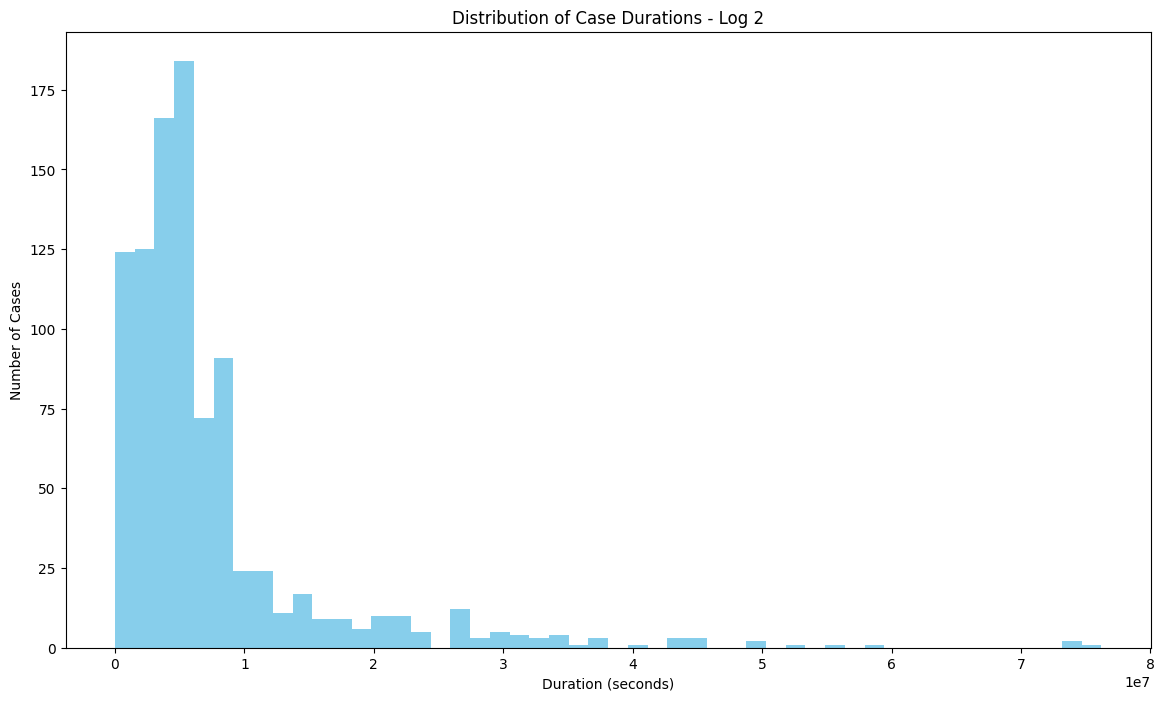

Number of cases: 937
Number of events: 38007
Number of unique activities: 377
Average number of events per case: 40.56


In [83]:
# Exploration and Visualization for Additional Event Logs
for i, df in enumerate(dataframes[1:], start=2):
    print(f"\nExploration and visualization for event log {i}")
    
    # Event Count
    total_events = df.shape[0]
    print(f"Total number of events: {total_events}")

    # Unique Activities
    unique_activities = df['concept:name'].nunique()
    print(f"Number of unique activities: {unique_activities}")

    # Timeframe
    df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
    timeframe_start = df['time:timestamp'].min()
    timeframe_end = df['time:timestamp'].max()
    print(f"Timeframe: {timeframe_start} to {timeframe_end}")

    # Bar Chart for Activity Frequency
    activity_counts = df['concept:name'].value_counts()
    plt.figure(figsize=(10, 6))
    activity_counts.plot(kind='bar')
    plt.title(f'Frequency of Activities - Log {i}')
    plt.xlabel('Activity')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Line Chart for Events Over Time
    events_over_time = df.resample('ME', on='time:timestamp').size()
    plt.figure(figsize=(12, 6))
    events_over_time.plot(kind='line')
    plt.title(f'Events Over Time - Log {i}')
    plt.xlabel('Time')
    plt.ylabel('Number of Events')
    plt.show()

    # Activity Duration Analysis
    df['end_timestamp'] = df.groupby('case:concept:name')['time:timestamp'].shift(-1)
    df['duration'] = (df['end_timestamp'] - df['time:timestamp']).dt.total_seconds()

    df.dropna(subset=['duration'], inplace=True)
    activity_duration = df.groupby('concept:name')['duration'].mean().sort_values()

    plt.figure(figsize=(14, 8))
    activity_duration.plot(kind='bar')
    plt.title(f'Average Duration of Activities - Log {i}')
    plt.xlabel('Activity')
    plt.ylabel('Average Duration (seconds)')
    plt.xticks(rotation=45)
    plt.show()

    # Case Duration Analysis
    case_duration = df.groupby('case:concept:name')['time:timestamp'].apply(lambda x: (x.max() - x.min()).total_seconds())

    plt.figure(figsize=(14, 8))
    plt.hist(case_duration, bins=50, color='skyblue')
    plt.title(f'Distribution of Case Durations - Log {i}')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Cases')
    plt.show()

    # Event Log Summary Statistics
    num_cases = df['case:concept:name'].nunique()
    num_events = df.shape[0]
    num_activities = df['concept:name'].nunique()
    avg_events_per_case = df.groupby('case:concept:name').size().mean()

    print(f"Number of cases: {num_cases}")
    print(f"Number of events: {num_events}")
    print(f"Number of unique activities: {num_activities}")
    print(f"Average number of events per case: {avg_events_per_case:.2f}")